<a href="https://colab.research.google.com/github/wel51x/Python-for-Data-Analysis/blob/master/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy Basics: Arrays and Vectorized Computation

In [0]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [0]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [0]:
%time for _ in range(10): my_arr2 = my_arr ** 2
%time for _ in range(10): my_list2 = [x ** 2 for x in my_list]

CPU times: user 23.4 ms, sys: 2.39 ms, total: 25.8 ms
Wall time: 34.8 ms
CPU times: user 3.05 s, sys: 167 ms, total: 3.22 s
Wall time: 3.22 s


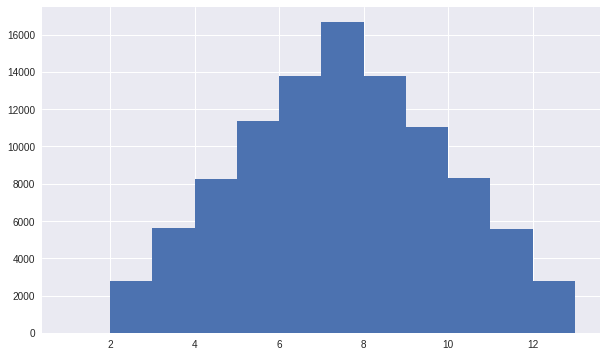

In [0]:
# Derek S Test
import random
dice = [1, 2, 3, 4, 5, 6]
tests = [random.choice(dice) + random.choice(dice) for _ in range(100000)]
plt.hist(tests, bins = range(1, 14));

## The NumPy ndarray: A Multidimensional Array Object

In [0]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [0]:
data * 10
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

In [0]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays

In [0]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [0]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [0]:
arr2.ndim, arr2.shape

(2, (2, 4))

In [0]:
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int64'))

In [0]:
print(np.zeros(10))
print(np.zeros((3, 6)))
np.empty((2, 3, 2))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [0]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [0]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype, arr2.dtype)

float64 int32


In [0]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
float_arr = arr.astype(np.float64)
float_arr.dtype

int64


dtype('float64')

In [0]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
arr.astype(np.int32)

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [0]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

==>> If casting were to fail for some reason (like a string that cannot be converted to
float64), a ValueError will be raised. Above I was a bit lazy and wrote float instead
of np.float64; NumPy aliases the Python types to its own equivalent data dtypes.

In [0]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

==>> Calling astype always creates a new array (a copy of the data), even
if the new dtype is the same as the old dtype.

In [0]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Arithmetic with NumPy Arrays

In [0]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)
print(arr - arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [0]:
print(1 / arr, "\n", arr ** 0.5)

[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]] 
 [[1.     1.4142 1.7321]
 [2.     2.2361 2.4495]]


In [0]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr)
print(arr2)
print(arr2 > arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 0.  4.  1.]
 [ 7.  2. 12.]]
[[False  True False]
 [ True False  True]]


### Basic Indexing and Slicing

In [0]:
arr = np.arange(10)
print(arr)
print("arr[5] =", arr[5], "arr[5:8] =", arr[5:8])

arr[5:8] = 12
arr

[0 1 2 3 4 5 6 7 8 9]
arr[5] = 5 arr[5:8] = [5 6 7]


array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [0]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

==>> data is not copied, and any modifications to the view will be
reflected in the source array.

In [0]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [0]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

==>> If you want a copy of a slice of an ndarray instead of a view, you
will need to explicitly copy the array—for example,
arr[5:8].copy().

In [0]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [0]:
arr2d[0][2]
arr2d[0, 2]

3

In [0]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [0]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [0]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [0]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [0]:
arr3d[1, 0]

array([7, 8, 9])

In [0]:
x = arr3d[1]
x, x[0]

(array([[ 7,  8,  9],
        [10, 11, 12]]), array([7, 8, 9]))

#### Indexing with slices

In [0]:
print(arr)
print(arr[1:6])

[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


In [0]:
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [0]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [0]:
arr2d[1, :2]

array([4, 5])

In [0]:
arr2d[:2, 2]

array([3, 6])

In [0]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [0]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

In [0]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]
 [-2.0016 -0.3718  1.669  -0.4386]
 [-0.5397  0.477   3.2489 -1.0212]
 [-0.5771  0.1241  0.3026  0.5238]]


In [0]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [0]:
data[names == 'Bob']

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

==>> Boolean selection will not fail if the boolean array is not the correct
length, so I recommend care when using this feature.

In [0]:
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[-0.5194 -0.5557]
 [ 1.3529  0.8864]]
[-0.5557  0.8864]


In [0]:
print(names != 'Bob')
print(data[~(names == 'Bob')])

[False  True  True False  True  True  True]
[[ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [-2.0016 -0.3718  1.669  -0.4386]
 [-0.5397  0.477   3.2489 -1.0212]
 [-0.5771  0.1241  0.3026  0.5238]]


In [0]:
cond = names == 'Bob'
data[~cond]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [0]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]
 [-2.0016 -0.3718  1.669  -0.4386]]


==>> The Python keywords and and or do not work with boolean arrays.
Use & (and) and | (or) instead.

In [0]:
data[data < 0] = 0
data

array([[0.    , 0.4789, 0.    , 0.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [0.769 , 1.2464, 1.0072, 0.    ],
       [0.275 , 0.2289, 1.3529, 0.8864],
       [0.    , 0.    , 1.669 , 0.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

In [0]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

### Fancy Indexing

In [0]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [0]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [0]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [0]:
arr = np.arange(32).reshape((8, 4))
print(arr)
# the elements (1, 0), (5, 3), (7, 1), and (2, 2) are selected
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]


In [0]:
# Jeez, this is all fucked-up
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of
how many dimensions the array has (here, only 2), the result of fancy indexing is
always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users
might have expected (myself included), which is the rectangular region formed by
selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [0]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing Arrays and Swapping Axes

In [0]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print("Transposed:")
arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Transposed:


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [0]:
arr = np.random.randn(6, 3)
print(arr)
print("inner matrix product with self transposed using np.dot:")
np.dot(arr.T, arr)

[[-1.2659  0.1198 -1.0635]
 [ 0.3329 -2.3594 -0.1995]
 [-1.542  -0.9707 -1.307 ]
 [ 0.2863  0.378  -0.7539]
 [ 0.3313  1.3497  0.0699]
 [ 0.2467 -0.0119  1.0048]]
inner matrix product with self transposed using np.dot:


array([[4.3437, 1.1122, 3.3505],
       [1.1122, 8.4884, 1.4096],
       [3.3505, 1.4096, 4.4621]])

In [0]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print("Transposed with a tuple of axis numbers (1, 0, 2):")
print(arr.transpose((1, 0, 2)))
print("eh?")

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
Transposed with a tuple of axis numbers (1, 0, 2):
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
eh?


Here, the axes have been reordered with the second axis first, the first axis second,
and the last axis unchanged.

Simple transposing with .T is a special case of swapping axes. ndarray has the method
swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange
the data:

In [0]:
print(arr)
print("swapaxes(1, 2):")
arr.swapaxes(1, 2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
swapaxes(1, 2):


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions

In [0]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

In [0]:
x = np.random.randn(8)
y = np.random.randn(8)
x
y
np.maximum(x, y)

In [0]:
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

In [0]:
arr
np.sqrt(arr)
np.sqrt(arr, arr)
arr

## Array-Oriented Programming with Arrays

In [0]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

In [0]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

In [0]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [0]:
plt.draw()

In [0]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

In [0]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [0]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

In [0]:
result = np.where(cond, xarr, yarr)
result

In [0]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

In [0]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### Mathematical and Statistical Methods

In [0]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

In [0]:
arr.mean(axis=1)
arr.sum(axis=0)

In [0]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

In [0]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

### Methods for Boolean Arrays

In [0]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

In [0]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

### Sorting

In [0]:
arr = np.random.randn(6)
arr
arr.sort()
arr

In [0]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

In [0]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

### Unique and Other Set Logic

In [0]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [0]:
sorted(set(names))

In [0]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

## File Input and Output with Arrays

In [0]:
arr = np.arange(10)
np.save('some_array', arr)

In [0]:
np.load('some_array.npy')

In [0]:
np.savez('array_archive.npz', a=arr, b=arr)

In [0]:
arch = np.load('array_archive.npz')
arch['b']

In [0]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [0]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

In [0]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

In [0]:
np.dot(x, y)

In [0]:
np.dot(x, np.ones(3))

In [0]:
x @ np.ones(3)

In [0]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

## Pseudorandom Number Generation

In [0]:
samples = np.random.normal(size=(4, 4))
samples

In [0]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

In [0]:
np.random.seed(1234)

In [0]:
rng = np.random.RandomState(1234)
rng.randn(10)

## Example: Random Walks

In [0]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [0]:
plt.figure()

In [0]:
plt.plot(walk[:100])

In [0]:
np.random.seed(12345)

In [0]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [0]:
walk.min()
walk.max()

In [0]:
(np.abs(walk) >= 10).argmax()

### Simulating Many Random Walks at Once

In [0]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [0]:
walks.max()
walks.min()

In [0]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

In [0]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

In [0]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

## Conclusion